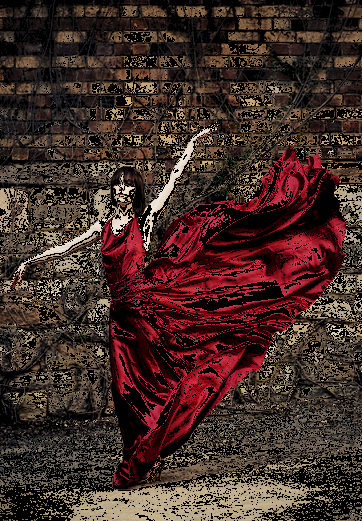

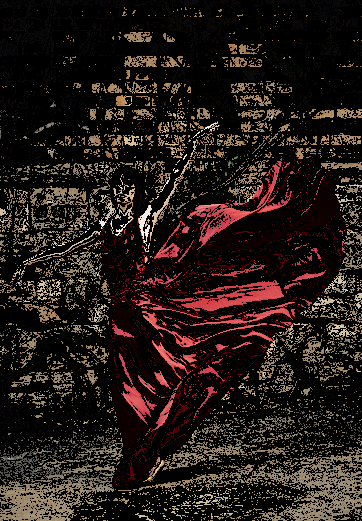

In [ ]:
import numpy as np
def Kmeans(data, k):
   
 # iterations = 10
  new_centroids = np.random.normal(127.5,127.5,(k,data.shape[1]))
  old_centroids = np.zeros((k,data.shape[1]))
  distances = np.zeros(k)
  labels = np.zeros(data.shape[0])
  sum = np.zeros((k,data.shape[1]))
  count_label = np.ones(k)
  min =0
  while ((old_centroids - new_centroids).all() >0.000001):
    for r in range(data.shape[0]):
      for c in range(k): 
        distances[c] = np.sqrt( (data[r,0]-new_centroids[c,0])**2 + (data[r,1]-new_centroids[c,1])**2 + (data[r,2]-new_centroids[c,2])**2 )
        if (c==0):
          min = distances[0]
          minC =0
        else:
          if (distances[c]< min):
            min = distances[c]
            minC = c
            
      labels[r] = minC    
 
    for r in range(data.shape[0]):
     for c in range(k):
       if (labels[r] == c):
         count_label[c] = count_label[c]+1
         sum[c,:] = sum[c,:] + data[r,:]

    old_centroids = new_centroids
    for y in range(data.shape[1]):
       for c in range(k):
         if (count_label[c]==0):
           new_centroids[c,y] = sum[c,y]
         else:
           new_centroids[c,y] = sum[c,y]/count_label[c]

  return labels, new_centroids


#from google.colab import files
#files.upload()

import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread("dance.PNG")
imgStrokes= cv.imread("dance stroke 1.png")

import numpy as np
n_foreground_pixels= 0
n_background_pixels=0

for i in range(imgStrokes.shape[0]):
  for j in range(imgStrokes.shape[1]):
    if ((imgStrokes[i,j,1] == 0) and (imgStrokes[i,j,2] > 0) and (imgStrokes[i,j,0]== 0)):
      n_foreground_pixels = n_foreground_pixels+1
    if (imgStrokes[i,j,0] > 0):
      n_background_pixels = n_background_pixels+1

foreground = np.zeros((n_foreground_pixels,3))
background = np.zeros((n_background_pixels,3))
fCount=0
bCount=0
for i in range(imgStrokes.shape[0]):
  for j in range(imgStrokes.shape[1]):
    if ((imgStrokes[i,j,1] == 0) and (imgStrokes[i,j,2] > 0) and (imgStrokes[i,j,0]== 0)):
      foreground[fCount,:] =img[i,j,:]
      fCount = fCount + 1
    if ((imgStrokes[i,j,1] == 0) and (imgStrokes[i,j,0] > 0) and (imgStrokes[i,j,2]== 0)):
      background[bCount,:] =img[i,j,:]
      bCount = bCount + 1

K = 64
labelBack, centerBack = Kmeans(background,K) 
labelFore, centerFore = Kmeans(foreground,K)

wF = np.zeros((K,1))
wB = np.zeros((K,1))
for k in range(K):
      wF[k,0] = labelFore[labelFore==k].shape[0]/(n_foreground_pixels)
      wB[k,0]=  labelBack[labelBack==k].shape[0]/(n_background_pixels)

likelyFore = np.zeros(img.shape)
likelyBack = np.zeros(img.shape)
lf= 0
lb= 0

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lf = np.sum(np.dot(wF.T, np.exp(-((centerFore[:,0] - img[i,j,0])**2+ (centerFore[:,1] - img[i,j,1])**2+ (centerFore[:,2] - img[i,j,2])**2))))
    lb=  np.sum(np.dot(wB.T,np.exp(-((centerBack[:,0] - img[i,j,0])**2+ (centerBack[:,1] - img[i,j,1])**2 + (centerBack[:,2] - img[i,j,2])**2))))
    if (lf> lb):
      likelyFore[i,j,:] = img[i,j,:]
    else:
      likelyBack[i,j,:] = img[i,j,:] 
cv2_imshow(likelyFore) 
cv2_imshow(likelyBack)

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1T_v5YSGcAN9M1cQMLn7EnTucskTVN1yB
"""

""" Extract seed pixels from the original image using the seed pixels from the stroke image"""
from google.colab import files
files.upload()

import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread("dog.PNG")
imgStrokes= cv.imread("dog stroke.png")

import numpy as np
n_foreground_pixels= 0
n_background_pixels=0
for i in range(imgStrokes.shape[0]):
  for j in range(imgStrokes.shape[1]):
    if ((imgStrokes[i,j,2] > 0) and (imgStrokes[i,j,0]== 0)):
      n_foreground_pixels = n_foreground_pixels+1
    if ((imgStrokes[i,j,0] > 0) ):
      n_background_pixels = n_background_pixels+1

foreground = np.zeros((n_foreground_pixels,3))
background = np.zeros((n_background_pixels,3))
fCount=0
bCount=0
for i in range(imgStrokes.shape[0]):
  for j in range(imgStrokes.shape[1]):
    if ((imgStrokes[i,j,2] > 0) and (imgStrokes[i,j,0]== 0)):
      foreground[fCount,:] =img[i,j,:]
      fCount = fCount + 1
    if ((imgStrokes[i,j,0] > 0) ):
      background[bCount,:] =img[i,j,:]
      bCount = bCount + 1


# convert to np.float32
Z = np.float32(background)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 64
retBack,labelBack,centerBack=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# convert to np.float32
Z = np.float32(foreground)
retFore,labelFore,centerFore =cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

wF = np.zeros((K,1))
wB = np.zeros((K,1))
for k in range(K):
      wF[k,0] = labelFore[labelFore==k].shape[0]/(n_foreground_pixels)
      wB[k,0]=  labelBack[labelBack==k].shape[0]/(n_background_pixels)

likelyFore = np.zeros(img.shape)
likelyBack = np.zeros(img.shape)
lf= 0
lb= 0

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lf = np.sum(np.dot(wF.T, np.exp(-((centerFore[:,0] - img[i,j,0])**2+ (centerFore[:,1] - img[i,j,1])**2+ (centerFore[:,2] - img[i,j,2])**2))))
    lb=  np.sum(np.dot(wB.T,np.exp(-((centerBack[:,0] - img[i,j,0])**2+ (centerBack[:,1] - img[i,j,1])**2 + (centerBack[:,2] - img[i,j,2])**2))))
    if (lf> lb):
      likelyFore[i,j,:] = img[i,j,:]
    else:
      likelyBack[i,j,:] = img[i,j,:] 
cv2_imshow(likelyFore) 
cv2_imshow(likelyBack)
